In [2]:
%matplotlib inline

In [14]:
from matplotlib import pyplot as plt
import numpy as np

In [7]:
data = [[3, 1.5, 1],
       [2, 1, 0],
       [4, 1.5, 1],
       [3, 1, 0],
       [3.5, .5, 1],
       [2, .5, 0],
       [5.5, 1, 1],
       [1, 1, 0]]
mystery_flower = [4.5, 1]

In [9]:
# network

#    o  flower
#   / \  w1,w2
#  o   o  length, width

w1 = np.random.randn();
w2 = np.random.randn();
b = np.random.randn();

In [10]:
def sigmoid(x):
    return (1/(1+ np.exp(-x)))

In [21]:
T = np.linspace(-5, 5, 10)  # from -5 to 5, 10 points
Y = sigmoid(T)
Y

array([0.00669285, 0.02005754, 0.0585369 , 0.1588691 , 0.36457644,
       0.63542356, 0.8411309 , 0.9414631 , 0.97994246, 0.99330715])

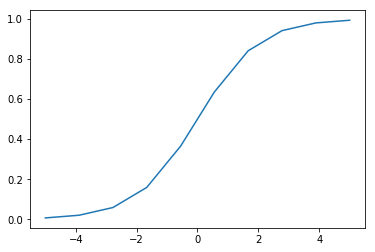

In [15]:
plt.plot(T,Y)

In [16]:
def sigmoid_p(x):
    return sigmoid(x)* (1-sigmoid(x))

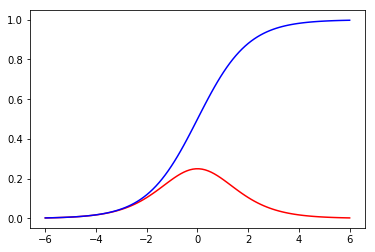

In [27]:
t = np.linspace(-6, 6, 100)
y = sigmoid_p(t)
plt.plot(t, y,c='r')
plt.plot(t, sigmoid(t),c='b')

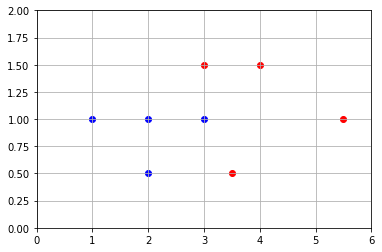

In [33]:
# scatter plot

plt.axis([0, 6, 0, 2])                        #axis measurements
plt.grid()                                    #show grid
for i in range(len(data)):
    point = data[i]
    color = 'r'                               #set default
    if point[2] == 0:
        color = 'b'                           # set 0 to blue color
    plt.scatter(point[0], point[1], c=color)


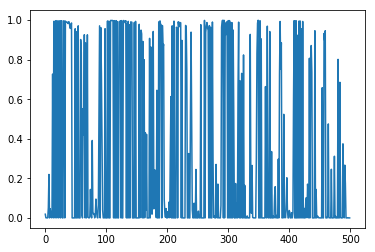

In [43]:
# training loop

learning_rate = .5
costs = []
for i in range(500):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
    
#     if i%1000 == 0:
#         print(cost)

    costs.append(cost)
    
    dcost_pred = 2*(pred-target)
    dpred_dz = sigmoid(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_b = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_b = dcost_dz * dz_b
    
    
    w1 = w1 - learning_rate*dcost_dw1
    w2 = w2 - learning_rate*dcost_dw2
    b = b - learning_rate*dcost_b
plt.plot(costs)

In [44]:
z = mystery_flower[0]*w1 + mystery_flower[1]*w2 +b
pred = sigmoid(z)
pred

0.9999960228630876

In [45]:
import os

In [46]:
def which_flower(length, width):
    z = length*w1 + width*w2 + b
    pred = sigmoid(z)
    if pred<.5:
        os.system("say blue")
    else:
        os.system("say red")
        
    

In [50]:
which_flower(1,1)